<a href="https://colab.research.google.com/github/denzilsaldanha/neural-nets-course/blob/master/part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[8 7 0 1 4 2 4 8]
 [1 1 5 1 0 5 7 6]
 [1 7 9 5 7 3 7 5]
 [6 6 2 7 6 0 9 6]
 [1 5 9 5 8 0 0 8]
 [8 6 7 7 7 8 1 9]
 [6 0 5 1 1 1 3 2]
 [2 6 4 3 5 5 4 6]]


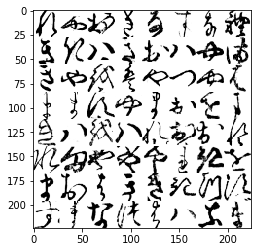

Training Linear...
Epoch: 0/10.. Test Accuracy: 0.509454607963562
Epoch: 1/10.. Test Accuracy: 0.5130374431610107
Epoch: 2/10.. Test Accuracy: 0.5104498267173767
Epoch: 3/10.. Test Accuracy: 0.5110469460487366
Epoch: 4/10.. Test Accuracy: 0.5117436051368713
Epoch: 5/10.. Test Accuracy: 0.5100517272949219
Epoch: 6/10.. Test Accuracy: 0.5110469460487366
Epoch: 7/10.. Test Accuracy: 0.5105493664741516
Epoch: 8/10.. Test Accuracy: 0.5122412443161011
Epoch: 9/10.. Test Accuracy: 0.5119426846504211
Training FeedForward...
Epoch: 0/10.. Test Accuracy: 0.656449019908905
Epoch: 1/10.. Test Accuracy: 0.6743630766868591
Epoch: 2/10.. Test Accuracy: 0.6880971193313599
Epoch: 3/10.. Test Accuracy: 0.6901870965957642
Epoch: 4/10.. Test Accuracy: 0.6931727528572083
Epoch: 5/10.. Test Accuracy: 0.6997412443161011
Epoch: 6/10.. Test Accuracy: 0.6947651505470276
Epoch: 7/10.. Test Accuracy: 0.693869411945343
Epoch: 8/10.. Test Accuracy: 0.6992436051368713
Epoch: 9/10.. Test Accuracy: 0.6881966590881348


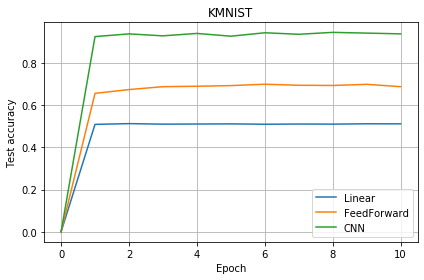

<Figure size 432x288 with 0 Axes>

In [0]:
#!/usr/bin/env python3
"""
part3.py

UNSW COMP9444 Neural Networks and Deep Learning

ONLY COMPLETE METHODS AND CLASSES MARKED "TODO".

DO NOT MODIFY IMPORTS. DO NOT ADD EXTRA FUNCTIONS.
DO NOT MODIFY EXISTING FUNCTION SIGNATURES.
DO NOT IMPORT ADDITIONAL LIBRARIES.
DOING SO MAY CAUSE YOUR CODE TO FAIL AUTOMATED TESTING.
"""
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


class Linear(nn.Module):
    """
    DO NOT MODIFY
    Linear (10) -> ReLU -> LogSoftmax
    """

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # make sure inputs are flattened
#         print(x.size())
        x = F.relu(self.fc1(x))
        x = F.log_softmax(x, dim=1)  # preserve batch dim

        return x


class FeedForward(nn.Module):
    """
    TODO: Implement the following network structure
    Linear (256) -> ReLU -> Linear(64) -> ReLU -> Linear(10) -> ReLU-> LogSoftmax
    """
    def __init__(self):
      super().__init__()
      self.fc1 = nn.Linear(784, 256,bias = True)  # 1st Full-Connected Layer: 784 (input data) -> 500 (hidden node)
      self.fc2 = nn.Linear(256, 64,bias = True) # 2nd Full-Connected Layer: 500 (hidden node) -> 10 (output class)
      self.fc3 = nn.Linear(64, 10, bias = True)
      self.relu = nn.ReLU()                          # Non-Linear ReLU Layer: max(0,x)
        
  
    def forward(self, x):                              # Forward pass: stacking each layer together
#       print(x.size())
      x = x.view(x.shape[0], -1)
      x = self.fc1(x)
      x = self.relu(x)
      x = self.fc2(x)
      x = self.relu(x)
      x = self.fc3(x)
      x = self.relu(x)
#       print(out)
      x =  F.log_softmax(x, dim=1) 
#       print(out)
      return x


class CNN(nn.Module):
    """
    TODO: Implement CNN Network structure

    conv1 (channels = 10, kernel size= 5, stride = 1) -> Relu -> max pool (kernel size = 2x2) ->
    conv2 (channels = 50, kernel size= 5, stride = 1) -> Relu -> max pool (kernel size = 2x2) ->
    Linear (256) -> Relu -> Linear (10) -> LogSoftmax


    Hint: You will need to reshape outputs from the last conv layer prior to feeding them into
    the linear layers.
    """
    
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(1,10,kernel_size = 5, stride = 1)
      self.relu = nn.ReLU()
      self.max_pool = nn.MaxPool2d(kernel_size = 2,stride =2)
      self.conv2 = nn.Conv2d(10,50,kernel_size = 5,stride =1)
      self.fc1 = nn.Linear(800,256,bias = True)
      self.fc2 = nn.Linear (256,10,bias = True)
#       self.softmax= nn.LogSoftmax(1)
    
    def forward(self, x):
#       batch,channel,ip,op
#       x = x.view(x.shape[0], -1)
      x = self.conv1(x)
      x = self.relu(x)
      x = self.max_pool(x)
      x = self.conv2(x)
      x = self.relu(x)
      x = self.max_pool(x)
#       print(x.size())

      # Flattening before sending it into the network
      x = x.view(x.shape[0], -1) 
      x = self.fc1(x)
      x = self.relu(x)
      x = self.fc2(x)
      x =  F.log_softmax(x, dim=1) 
      return x
                 
#       print(x.size())   
    
                               
    

class NNModel:
    def __init__(self, network, learning_rate):
        """
        Load Data, initialize a given network structure and set learning rate
        DO NOT MODIFY
        """

        # Define a transform to normalize the data
        transform = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize((0.5,), (0.5,))])

        # Download and load the training data
        trainset = datasets.KMNIST(root='./data', train=True, download=True, transform=transform)
        self.trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=False)

        # Download and load the test data
        testset = datasets.KMNIST(root='./data', train=False, download=True, transform=transform)
        self.testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

        self.model = network

        """
        TODO: Set appropriate loss function such that learning is equivalent to minimizing the
        cross entropy loss. Note that we are outputting log-softmax values from our networks,
        not raw softmax values, so just using torch.nn.CrossEntropyLoss is incorrect.
        
        Hint: All networks output log-softmax values (i.e. log probabilities or.. likelihoods.). 
        """
        self.lossfn = nn.NLLLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)

        self.num_train_samples = len(self.trainloader)
        self.num_test_samples = len(self.testloader)

    def view_batch(self):
        """
        TODO: Display first batch of images from trainloader in 8x8 grid

        Do not make calls to plt.imshow() here

        Return:
           1) A float32 numpy array (of dim [28*8, 28*8]), containing a tiling of the batch images,
           place the first 8 images on the first row, the second 8 on the second row, and so on

           2) An int 8x8 numpy array of labels corresponding to this tiling
        """
        images, labels = iter(self.trainloader).next()
#         print('images = ',len(images))
#         print('labels =', len(labels))
        images = images.view(8,8,28,28).transpose(2,1).reshape(28*8,28*8).numpy()
        reshape_labels = labels.reshape(8,8).numpy()
#         images1 = images
#         images2 = images1
        return images,reshape_labels

    def train_step(self):
        """
        Used for submission tests and may be usefull for debugging
        DO NOT MODIFY
        """
        
        self.model.train()
        for images, labels in self.trainloader:
            log_ps = self.model(images)
            loss = self.lossfn(log_ps, labels)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            return

    def train_epoch(self):
        self.model.train()
        for images, labels in self.trainloader:
            log_ps = self.model(images)
            loss = self.lossfn(log_ps, labels)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        return

    def eval(self):
        self.model.eval()
        accuracy = 0
        with torch.no_grad():
            for images, labels in self.testloader:
                log_ps = self.model(images)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        return accuracy / self.num_test_samples


def plot_result(results, names):
    """
    Take a 2D list/array, where row is accuracy at each epoch of training for given model, and
    names of each model, and display training curves
    """
    for i, r in enumerate(results):
        plt.plot(range(len(r)), r, label=names[i])
    plt.legend()
    plt.title("KMNIST")
    plt.xlabel("Epoch")
    plt.ylabel("Test accuracy")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.savefig("./part_2_plot.png")


def main():
    models = [Linear(), FeedForward(), CNN()]  # Change during development
    epochs = 10
    results = []

    # Can comment the below out during development
    images, labels = NNModel(Linear(), 0.003).view_batch()
    print(labels)
    plt.imshow(images, cmap="Greys")
    plt.show()

    for model in models:
        print(f"Training {model.__class__.__name__}...")
        m = NNModel(model, 0.003)

        accuracies = [0]
        for e in range(epochs):
            m.train_epoch()
            accuracy = m.eval()
            print(f"Epoch: {e}/{epochs}.. Test Accuracy: {accuracy}")
            accuracies.append(accuracy)
        results.append(accuracies)

    plot_result(results, [m.__class__.__name__ for m in models])


if __name__ == "__main__":
    main()
